<a href="https://colab.research.google.com/github/bappy15010/Brain-Tumor-Detection/blob/master/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

In [8]:
# Now Take All the ata into a list
data_dir='BRAIN_DATA'
total_image=3064
trainindata=[]
for i in range(1,total_image+1):
  filename=str(i)+".mat"
  data=h5py.File(os.path.join(data_dir,filename),"r")
  trainindata.append(data)

  if i%100==0:
    print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [48]:
trainindata[0]["cjdata"]["image"]

<HDF5 dataset "image": shape (512, 512), type "<i2">

In [9]:
import keras
import random
random.shuffle(trainindata)

In [49]:
import numpy as np
 # Now take all the image as train and test
trainx=[]
trainy=[]
testx=[]
testy=[]

size=round(4*total_image/5) # Split the dataset into 80:20
# For trainx and trainy
for i in range(size):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    trainx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    trainy.append(label)
# For trainx and trainy
for i in range(size,total_image):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    testx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    testy.append(label)

In [70]:
# Converting list to numpy array
trainx=np.array(trainx).reshape(-1,512,512)
testx=np.array(testx).reshape(-1,512,512)
trainy=np.array(trainy)
testy=np.array(testy)

In [53]:
# print(testy)

In [55]:
# print(trainx)

In [71]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2438, 512, 512)
(611, 512, 512)
(2438,)
(611,)


In [23]:
# print(testx)

In [67]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Conv1D,MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU

In [26]:
#Initial  BLock of the model
ini_input=keras.Input(shape=(512,512,1),name="image")

x1=layers.Conv2D(64,(22,22),strides=2)(ini_input)
x1=layers.MaxPooling2D((4,4))(x1)
x1=layers.BatchNormalization()(x1)

x2=layers.Conv2D(128,(11,11),strides=2,padding="same")(x1)
x2=layers.MaxPooling2D((2,2))(x2)
x2=layers.BatchNormalization()(x2)

x3=layers.Conv2D(256,(7,7),strides=2,padding="same")(x2)
x3=layers.MaxPooling2D((2,2))(x3)
x3=layers.BatchNormalization()(x3)

x4=layers.Conv2D(512,(3,3),strides=2,padding="same")(x3)
x4=layers.MaxPooling2D((2,2))(x4)
x4=layers.BatchNormalization()(x4)

x5=layers.GlobalAveragePooling2D()(x4)
x5=layers.Activation("relu")(x5)

x6=layers.Dense(1024,"relu")(x5)
x6=layers.BatchNormalization()(x6)
x7=layers.Dense(512,"relu")(x6)
x7=layers.BatchNormalization()(x7)
x8=layers.Dense(256,"relu")(x7)
x8=layers.BatchNormalization()(x8)
x8=layers.Dropout(.2)(x8)
x9=layers.Dense(3)(x8)
pred=layers.Activation("softmax")(x9)

model=keras.Model(inputs=ini_input,outputs=pred)

In [72]:
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape = (512,512)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(64, return_sequences=True)))

model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(128, return_sequences=True)))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='softmax'))

In [30]:
# model.summary()

In [74]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [76]:
model.fit(trainx,
          trainy,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_data=(testx,testy),
          shuffle=False)

Epoch 1/10
77/77 [==============================] - 38s 412ms/step - loss: 1.1696 - accuracy: 0.5418 - val_loss: 0.5506 - val_accuracy: 0.7578
Epoch 2/10
77/77 [==============================] - 33s 425ms/step - loss: 0.5458 - accuracy: 0.7826 - val_loss: 0.3951 - val_accuracy: 0.8380
Epoch 3/10
77/77 [==============================] - 33s 430ms/step - loss: 0.4424 - accuracy: 0.8240 - val_loss: 0.3773 - val_accuracy: 0.8462
Epoch 4/10
77/77 [==============================] - 34s 442ms/step - loss: 0.4355 - accuracy: 0.8273 - val_loss: 0.3604 - val_accuracy: 0.8494
Epoch 5/10
77/77 [==============================] - 35s 457ms/step - loss: 0.3952 - accuracy: 0.8339 - val_loss: 0.3585 - val_accuracy: 0.8462
Epoch 6/10
77/77 [==============================] - 35s 460ms/step - loss: 0.3712 - accuracy: 0.8433 - val_loss: 0.3305 - val_accuracy: 0.8609
Epoch 7/10
77/77 [==============================] - 35s 461ms/step - loss: 0.3772 - accuracy: 0.8495 - val_loss: 0.3348 - val_accuracy: 0.8691

In [77]:
r=model.fit(trainx,
          trainy,
          epochs=50,
          batch_size=32,
          verbose=1,
          validation_data=(testx,testy),
          shuffle=False
          )

Epoch 1/50
77/77 [==============================] - 35s 459ms/step - loss: 0.3648 - accuracy: 0.8482 - val_loss: 0.4375 - val_accuracy: 0.8101
Epoch 2/50
77/77 [==============================] - 35s 458ms/step - loss: 0.3437 - accuracy: 0.8564 - val_loss: 0.3382 - val_accuracy: 0.8543
Epoch 3/50
77/77 [==============================] - 35s 461ms/step - loss: 0.3239 - accuracy: 0.8597 - val_loss: 0.4054 - val_accuracy: 0.8282
Epoch 4/50
77/77 [==============================] - 35s 451ms/step - loss: 0.3836 - accuracy: 0.8409 - val_loss: 0.3337 - val_accuracy: 0.8625
Epoch 5/50
77/77 [==============================] - 35s 454ms/step - loss: 0.3345 - accuracy: 0.8507 - val_loss: 0.3662 - val_accuracy: 0.8494
Epoch 6/50
77/77 [==============================] - 35s 456ms/step - loss: 0.3254 - accuracy: 0.8581 - val_loss: 0.2985 - val_accuracy: 0.8592
Epoch 7/50
77/77 [==============================] - 35s 454ms/step - loss: 0.3125 - accuracy: 0.8614 - val_loss: 0.3298 - val_accuracy: 0.8592

In [82]:
len(r.history['accuracy'])

50

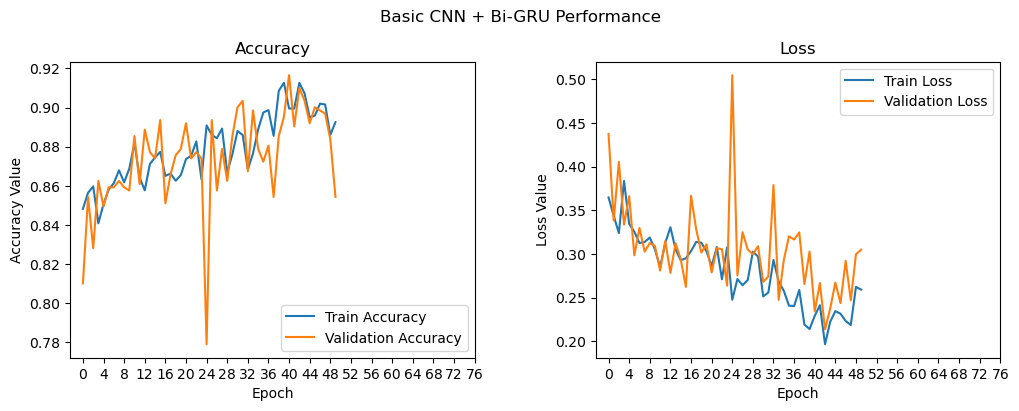

In [101]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN + Bi-GRU Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,50))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 50, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.savefig('CNN + Bi-GRU Performance.png')

In [85]:
pred=model.predict(testx)
Y_pred = np.argmax(pred, 1)

20/20 [==============================] - 3s 86ms/step


In [86]:
Y_pred.shape

(611,)

In [87]:
testy.shape

(611,)

In [89]:
# Y_pred

In [91]:
# testy

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(testy, Y_pred))

Confusion Matrix
[[114  19   4]
 [ 33 248   1]
 [ 21  11 160]]


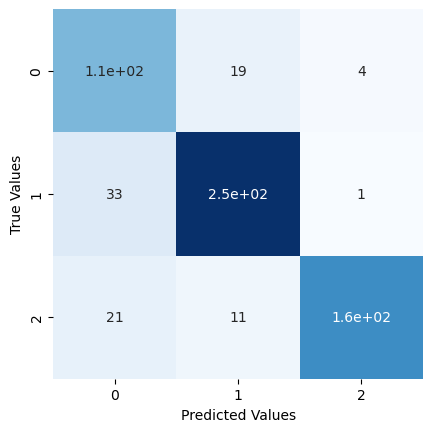

In [93]:
import seaborn as sns
cm=confusion_matrix(testy, Y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [94]:
print('Classification Report')
target_names = ['Meningioma', 'Glioma', 'Pituitary']
print(classification_report(testy, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  Meningioma       0.68      0.83      0.75       137
      Glioma       0.89      0.88      0.89       282
   Pituitary       0.97      0.83      0.90       192

    accuracy                           0.85       611
   macro avg       0.85      0.85      0.84       611
weighted avg       0.87      0.85      0.86       611



In [ ]:
print(trainy)

[Text(0, 0.5, 'Meningioma'), Text(0, 1.5, 'Glioma'), Text(0, 2.5, 'Pituitary')]

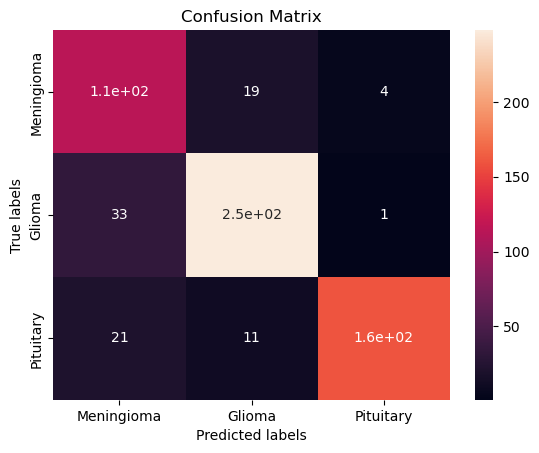

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary']); ax.yaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary'])

Confusion Matrix :
[[114  19   4]
 [ 33 248   1]
 [ 21  11 160]]
Accuracy Score : 0.8543371522094927
Report : 
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       137
           1       0.89      0.88      0.89       282
           2       0.97      0.83      0.90       192

    accuracy                           0.85       611
   macro avg       0.85      0.85      0.84       611
weighted avg       0.87      0.85      0.86       611



<AxesSubplot: >

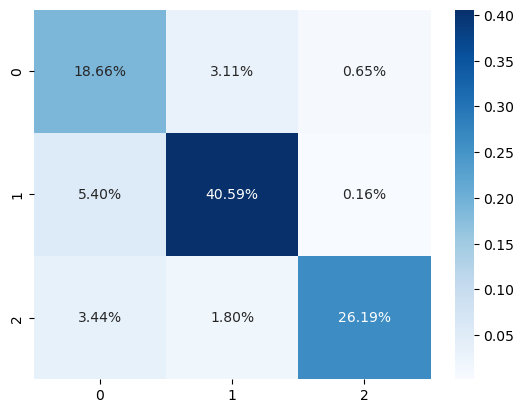

In [96]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(testy,Y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(testy,Y_pred)) 
print('Report : ')
print(classification_report(testy,Y_pred))

sns.heatmap(results/np.sum(results), annot=True, 
            fmt='.2%', cmap='Blues')

In [97]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(testy, Y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.8859014518695307

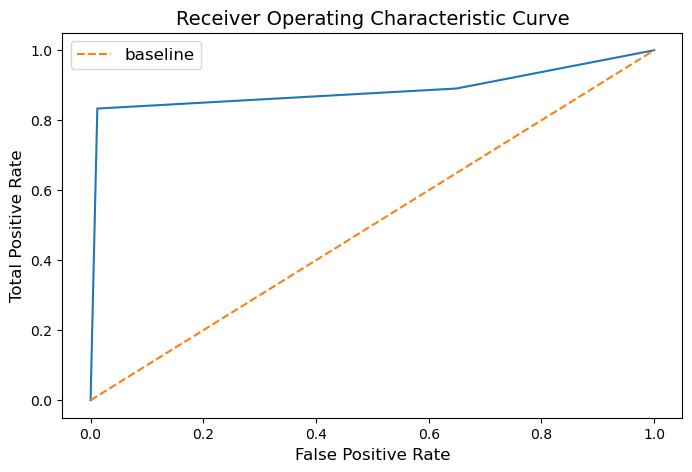

In [98]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);